In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [2]:
p1_data = pd.read_csv('data/P1.txt', delimiter=' ')

In [3]:
p1_data

,number,x,y,demand
0,1,34,-11,17
1,2,29,-35,17
2,3,15,0,10
3,4,-20,-24,4
4,5,-8,-21,7
...,...,...,...,...
95,96,-24,8,13
96,97,32,-33,17
97,98,15,21,14
98,99,-16,35,15


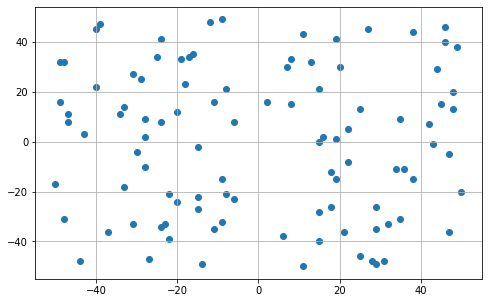

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(p1_data.x, p1_data.y)
plt.grid(visible=True)
plt.show()

In [13]:
model = KMeans(n_clusters=6)
model.fit(p1_data[['x', 'y']])

KMeans(n_clusters=6)

In [14]:
pred_cluster = model.predict(p1_data[['x', 'y']])

In [18]:
p1_data['cluster'] = pred_cluster

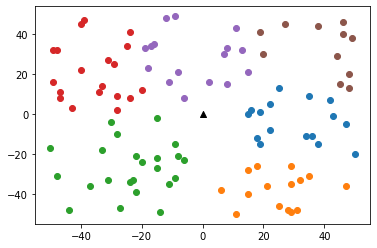

In [19]:
for cluster in p1_data.cluster.unique():
    plt.scatter(p1_data[p1_data.cluster == cluster].x, p1_data[p1_data.cluster == cluster].y)
plt.scatter(0, 0, marker='^', c='k')

In [40]:
## to produce gene

MAX_CAPACITY = 70
pop = []

## create 10 choromosome
for cluster in p1_data.cluster.unique():
    gene = ''
    capacity = 0
    for _, data in p1_data[p1_data.cluster == cluster].iterrows():
        capacity += data.demand
        ## if couldn't carry item, return to depot
        if capacity >= MAX_CAPACITY:
            gene += '*'
            ## reset the capacity
            capacity = 0
        else:
            gene += str(data.number + 100)
    ## return to depot
    gene += '*'
    pop.append(gene)

In [11]:
def without_replacement_sampling(array):
    sampled_value = random.sample(array, 1)
    array.remove(sampled_value[0])

    return sampled_value[0]

In [107]:
def generate_chromosomes_count(dataset, MAX_CAPACITY, pop_count=6, depot_symbol='(1)'):
    """
    Generate chromosomes of vehicles from 100 data point (data points are summed with 100 in order to be able to know whether the genes in chromosome )
    generate chromosomes with population count
    """

    population = []

    arr = np.linspace(1, 100, 100, dtype=int)
    arr = list(arr)

    gene_length = (len(arr) // pop_count) + 3

    # while len(arr) > 0:
    for pop_idx in range(pop_count):
        gene = depot_symbol
        capacity = 0

        i = 0
        while i < gene_length:
            # if len(arr) == 0:
            #     break

            customer_number = without_replacement_sampling(arr)
            data = dataset[dataset.number == customer_number]
            capacity += data.demand.values[0]

            ## if couldn't carry item, return to depot
            if capacity >= MAX_CAPACITY:
                gene += depot_symbol
                ## reset the capacity
                capacity = 0

                ## bring back the customer to our array
                ## since we haven't used it
                arr.append(data.number.values[0])

            else:
                gene += str(data.number.values[0] + 100) 
            i+=1
        gene += depot_symbol if gene[-3:] != depot_symbol else ''
        print(gene)
        population.append(gene)
    print(arr)
    
    return population

In [119]:
population_U = generate_chromosomes_count(p1_data, MAX_CAPACITY=70)


(1)136134101133151(1)104192182109183113(1)164149118(1)181165(1)
(1)168195200155147196166(1)146105103175108126(1)129172131160(1)
(1)158171188197122(1)162111154194(1)150121179189(1)173185190(1)
(1)132163152170191139(1)157184144123143187145(1)193198148(1)
(1)120110112124180(1)153117167138115(1)137161130106114(1)119(1)
(1)141135169125(1)142156174178140(1)127102107176199(1)177116(1)
[28, 86, 59]


In [167]:
All_pop = ''
for chromosome in population_U:
    All_pop += chromosome.replace('(1)', '')
All_pop

'136134101133151104192182109183113164149118181165168195200155147196166146105103175108126129172131160158171188197122162111154194150121179189173185190132163152170191139157184144123143187145193198148120110112124180153117167138115137161130106114119141135169125142156174178140127102107176199177116'

In [168]:
dataset = p1_data
capacity = 0
depot_symbol = '(1)'
processed_chromsomes = depot_symbol
i = 3
# for i in range(0, len(All_pop), 3):
while i < len(All_pop):
    # if All_pop[i-3: i]:
    # print()
    customer = int(All_pop[i-3: i]) - 100
    
    capacity += p1_data[p1_data.number == customer].demand.values[0]
    if capacity > 70:
        processed_chromsomes += depot_symbol
        capacity = 0
    else:
        processed_chromsomes += All_pop[i-3:i]
        i += 3

processed_chromsomes += depot_symbol

In [177]:
print([idx if c == '(' else 0 for idx, c in enumerate(processed_chromsomes)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 267, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 318, 0, 0, 0, 0, 

In [160]:
vehicle_count = 6
chromsome_vehicle = ''
for i in range(0, len(processed_chromsomes), step):
    chromsome_vehicle += processed_chromsomes[i-step: i] + '|'

In [161]:
chromsome_vehicle

'|(1)136134101133151104(1)192182109183113164(1)149118181(1)1|65168195200155147196(1)166146105103175108126(1)12917213116|0158171188197(1)122162111154(1)194150121179(1)189173185190|132163(1)152170191139157184(1)144123143187145(1)193198148(|1)120110112124180(1)153117167138115(1)137161130106114(1)11|'

In [19]:
population = generate_vehicles_chromosomes(p1_data, 70, gene_length=6, depot_symbol='(1)')

def append_vehicles(population):
    """
    Append the vehicles' chromosomes together and create a bigger chromosome
    """
    string_vehicles = ''
    for pop in population:
        string_vehicles += pop
    
    return string_vehicles

['(1)114189157186168135(1)',
 '(1)147193200131(1)174140(1)',
 '(1)179143125(1)107199106(1)',
 '(1)116126184188104(1)138(1)',
 '(1)124142156155185(1)110(1)',
 '(1)172190105101122177(1)',
 '(1)154164119163150(1)118(1)',
 '(1)112121128191144117(1)',
 '(1)195139141160(1)192130(1)',
 '(1)145132198151153(1)134(1)',
 '(1)197176109161(1)162166(1)',
 '(1)196178194169115(1)165(1)',
 '(1)158127123(1)187152111(1)',
 '(1)148146149120183(1)167(1)',
 '(1)170173159133102175(1)',
 '(1)181113171103129(1)182(1)',
 '(1)137108136180(1)']

In [83]:
tot = 0
for idx, pop in enumerate(population_U):
    chromosome = pop.replace('(1)', '')
    pop_len = len(chromosome)
    
    print(idx, ' ', pop_len/3)
    tot += pop_len/3
tot

0   17.0
1   15.0
2   16.0
3   17.0
4   17.0
5   16.0


98.0

In [490]:
def evaluate_distances_gone(chromosome, dataset, DEPOT_LOCATION, depot_symbol='(1)'):
    """
    evaluate one chromosome by the distance it has went, here just one depot is assumed here!
    """
    chromosome_length = len(chromosome)

    last_X_loc, last_Y_loc = DEPOT_LOCATION

    distance = 0
    for i in range(1, chromosome_length, 3):
        if chromosome[i-3:i] and chromosome[i-3:i] != depot_symbol:
            customer_number = int(chromosome[i-3:i]) - 100
            customer = dataset[dataset.number == customer_number]
            
            customer_X = customer.x.values[0]
            customer_Y = customer.y.values[0]


            distance += abs(customer_X - last_X_loc) + abs(customer_Y - last_Y_loc)
            last_X_loc = customer_X
            last_Y_loc = customer_Y
        ## if it goes back to the depot
        elif chromosome[i-3:i] and chromosome[i-3:i] == depot_symbol:
            distance += abs(last_X_loc - DEPOT_LOCATION[0]) + abs(last_Y_loc - DEPOT_LOCATION[1]) 
        
    ## We know always the vehicle goes back to the depot, So the distance to the depot must be included
    distance += abs(last_X_loc - DEPOT_LOCATION[0]) + abs(last_Y_loc - DEPOT_LOCATION[1]) 

    return distance

In [344]:
def evaluate_fitness_distance(chromosomes_arr, dataset, DEPOT_LOCATION, depot_symbol='(1)'):
    """
    Evaluate fitness values of multiple chromosomes using the distance metric
    
    Parameters:
    ------------
    chromosome_arr : array of strings
        the chromosomes created as the genotypes
    dataset : dataframe
        the dataframe that contains the information location of each customer -> (x,y)
    DEPOT_LOCATION : tuple
        the starting and ending location of each vehicle
    
    Returns:
    ---------
    fitness_arr : array of integers
        the fitness value based on the distance gone for all the population
    """
    fitness_arr = []
    for chromosome in  chromosomes_arr:
        fitness = evaluate_distances_gone(chromosome, dataset, DEPOT_LOCATION, depot_symbol)
        fitness_arr.append(fitness)
    
    return fitness_arr

In [498]:
DEPOT_LOCATION = (-14, 9)
# evaluate_fitness_distance(population, p1_data, DEPOT_LOCATION )

In [380]:
def cross_over(chromosome1, chromosome2, depot_symbol=['***'], double_point=False):
    """
    single or double point cross-over for two chromosomes
    in this cross over, the corss over will be applied on raw chromosomes without depot (the depot symbols will be removed)
    then the time that needed to go back to depot the depot symbol will be inserted in genes

    Parameters:
    ------------
    chromosome1 : string
        the genes representing one vehicle
    chromosome2 : string
        the genes representing one vehicle
    depot_symbol : string
        if we have multiple depots
        then there would be different symbols for each
    double_point : bool
        if True, then the cross-over will be double point
        default is False
    
    
    Returns:
    ---------
    offspring1 : string
        the new chromsome created in cross-over phase
    offspring2: string
        the new chromsome created in cross-over phase
    """
    ## intialize the variables
    offspring1 = None
    offspring2 = None

    ## removing the depot genes from each chromosome
    parent1 = create_raw_chromsome(chromosome1, depot_symbol)
    parent2 = create_raw_chromsome(chromosome2, depot_symbol)
    
    ## possible indices to break the chromsome
    ## since each 3 characters represent one phenotype, then breaking gene from anywhere is not possible
    break_ind = random.randrange(3, 31, 3)
    break_ind2 = None

    if double_point:
        ## create another indice
        break_ind2 = random.randrange(3, 31, 3)
        ## to make sure two break points are not the same
        while break_ind2 == break_ind:
            break_ind2 = random.randrange(3, 31, 3)
    
        offspring1, offspring2 = break_double_point_gene(parent1, parent2, break_ind, break_ind2)
    else:
        offspring1, offspring2 = break_single_point_gene(parent1, parent2, break_ind)

    return offspring1, offspring2

            

def break_double_point_gene(chromosome1, chromosome2, ind1, ind2):
    """
    break the chromosome using double points
    """

    ## find the first and second breaking point of chromosome
    min_indice = min(ind1, ind2)
    max_indice = max(ind1, ind2)

    offspring1 = chromosome1[:min_indice] + chromosome2[min_indice:max_indice] + chromosome1[max_indice:]
    offspring2 = chromosome2[:min_indice] + chromosome1[min_indice:max_indice] + chromosome2[max_indice:]
    
    return offspring1, offspring2

def break_single_point_gene(chromosome1, chromosome2, indice):
    """
    break the chromosome using single points
    """

    ## find the first and second breaking point of chromosome
    offspring1 = chromosome1[:indice] + chromosome2[indice:]
    offspring2 = chromosome2[:indice] + chromosome1[indice:]
    
    return offspring1, offspring2

def create_raw_chromsome(chromosome, depot_symbols):
    """
    create a raw chromosome by removing the depots in its genes
    """
    ## the first and last chromsome's gene are the depots
    raw_chromomsome = chromosome[1:-1]
    
    ## removing the depot symbols
    for symbol in depot_symbols:
        raw_chromomsome = raw_chromomsome.replace(symbol, '')
    
    return raw_chromomsome

def post_process_capacity_based_chromsome(raw_chromsome, dataset, max_capacity, start_end_depot_symbol = '*', depot_symbol = '***'):
    """
    add the depot symbols to the chromsome using capacities
    if the vehicle (chromsome) does not have more capacity then adding the depot symbol to it
    means that the vehicle has gone back to depot and then served other next customers

    Important Notice: the depot symbol here is assumed as `*` for the starting point and ending point, and `***` for the middle ones 

    Parameters:
    ------------
    raw_chromsome : string
        a string representing the order of vechile serving
    dataset : dataframe
        getting the demand of each customer in it (`demand` column should be included with the customer number)
    max_capacity : int
        the maximum capacity that a vehicle can carry
    start_end_depot_symbol : string
        the start and the end of chromsome symbols representing the depot
    depot_symbol : string
        the depot symbol that is being used in the middle of the chromosomes
    
    Returns:
    ---------
    chromosome : string
        the chromsome with added depot symbols
    """
    tot_capacity = 0
    i = 3
    chromsome = ''
    # for i in range(0, len(raw_chromsome), 3):
    while i < len(raw_chromsome)+3:
        if raw_chromsome[i-3:i]:
            customer_number = int(raw_chromsome[i-3:i]) - 100
            customer = dataset[dataset.number == customer_number]

            tot_capacity += customer.demand.values[0]
        
            ## if the total capacity has gone more than the vehicle capacity, then add the depot symbol and 
            if tot_capacity > max_capacity:
                chromsome += depot_symbol
                ## reset the capacity
                tot_capacity = 0
            ## else add the customer number to the gene
            else:
                chromsome += raw_chromsome[i-3:i]
                ## go for the next customer (increase `i`) 
                i += 3

    ## start and the end of chromsome should be the depots
    chromsome = start_end_depot_symbol + chromsome + start_end_depot_symbol
        
    return chromsome

def post_process_capacity_based_population(raw_population, dataset, max_capacity ,start_end_depot_symbol = '*', depot_symbol = '***'):
    """
    post process the raw population based on their capacity 
    raw_population means population of chromsomes without any depot symbols

    Parameters:
    ------------
    raw_population : array of strings
        array of raw chromsomes
    dataset : dataframe
        getting the demand of each customer in it (`demand` column should be included with the customer number)
    start_end_depot_symbol : string
        the start and the end of chromsome symbols representing the depot
    depot_symbol : string
        the depot symbol that is being used in the middle of the chromosomes
    
    Returns:
    ---------
    population : array of strings
        the array of populations with depot symbols in it
    """
    population = []

    for raw_chromsome in raw_population:
        chromsome = post_process_capacity_based_chromsome(raw_chromsome, dataset, max_capacity, start_end_depot_symbol, depot_symbol)
        population.append(chromsome)
    
    return population

In [381]:
pop = cross_over(population[0], population[1])
pop

('163138170102106129143128116113', '159150189119158186117141165175')

In [383]:
pop2 = cross_over(population[0], population[1], double_point=True)
pop2

('163138170102158129143128116113', '159150189119106186117141165175')

In [382]:
post_process_capacity_based_population(pop, p1_data, 70)

['*163138170102106***129143128116113*',
 '*159150189119158***186117141165***175*']

# The method
## With Capacity Limit
1. **Representation** 
TODO: create shuffled customers in one string <br>
then add the deposit into the string based on capacities <br>
finally add `|` symbol to the string in the places before or after the depot_symbol to show different vehicles <br>
fitness is based on distances gone <br>

2. **Recombination**
TODO: Use the premutation methods <br>
and by that, recalculate the depots: make sure the capacities for vehicles are correct, <br>
if not correct recalculate the capacity and the routings for the next parts of the chromsome <br>

## With Distance Limit
1. all the work is the same but use the distance metric instead of capacity 

In [183]:
def generate_vehicles_chromosomes(dataset, MAX_CAPACITY, depot_symbol='(1)'):
    """
    Generate chromosomes of vehicles from 100 data point (data points are summed with 100 in order to be able to know whether the genes in chromosome )

    """

    arr = np.linspace(1, 100, 100, dtype=int)
    arr = list(arr)

    gene = depot_symbol
    capacity = 0

    while len(arr) > 0:

        customer_number = without_replacement_sampling(arr)
        data = dataset[dataset.number == customer_number]
        capacity += data.demand.values[0]

        ## if couldn't carry item, return to depot
        if capacity >= MAX_CAPACITY:
            gene += depot_symbol
            ## reset the capacity
            capacity = 0

            ## bring back the customer to our array
            ## since we haven't used it
            arr.append(data.number.values[0])

        else:
            gene += str(data.number.values[0] + 100) 
    gene += depot_symbol if gene[-1] != depot_symbol else ''
    
    return gene

In [186]:
chromosome = generate_vehicles_chromosomes(p1_data, 70)
chromosome

'(1)122173104141112(1)133159156118169108(1)200197138161109(1)170167120145(1)132179187188(1)147155130192146148199(1)121178125152194(1)176184142103110183(1)168177186116111(1)182172180190139137101(1)198127126128131163(1)149166154(1)134119185158129(1)160144195135157117136(1)151189181162(1)124107102143165(1)175191164115174123(1)171193105106(1)140114150153113(1)196(1)'

In [444]:
def divide_vehicles(chromosome, vehicle_count, depot_symbol):
    """
    divide the chromsome to make different vehicles
    """

    ## division point is the depots
    ## one less vehicle count should be the division points
    sample_arr = np.linspace(1, chromosome.count(depot_symbol) - 2, chromosome.count(depot_symbol) - 1, dtype=int )
    sample_arr = list(sample_arr)
    division_point = []
    for _ in range(vehicle_count - 1):
        point = without_replacement_sampling(sample_arr)
        division_point.append(point)
        
    ## making the copy of string
    vehicle_chromsome = chromosome

    for point in division_point:
        ## the process of finding point-th depot in chromsome
        occurance = -1
        occurance_idx = 0
        while occurance < point:
            occurance_idx = vehicle_chromsome.find(depot_symbol, occurance_idx) + 1
            occurance += 1
        
        vehicle_chromsome = vehicle_chromsome[:occurance_idx+2] + '|' + vehicle_chromsome[occurance_idx+2:]

    return vehicle_chromsome


In [448]:
def process_division_points(vehicle_chromosome, depot_symbol):
    """
    Add the depot symbol to division points
    """
    processed_vehicle_chromsome = vehicle_chromosome

    division_counts = vehicle_chromosome.count('|')

    for idx in range(division_counts):
        occurance = -1
        occurance_idx = 0
        while occurance < idx:
            occurance_idx = processed_vehicle_chromsome.find('|', occurance_idx) + 1
            occurance += 1
        
        processed_vehicle_chromsome = processed_vehicle_chromsome[:occurance_idx] + depot_symbol + processed_vehicle_chromsome[occurance_idx:]
    
    return processed_vehicle_chromsome


In [449]:
U_chromsome = divide_vehicles(chromosome, 6, '(1)')
U_chromsome

'(1)122173104141112(1)133159156118169108(1)200197138161109(1)170167120145(1)|132179187188(1)|147155130192146148199(1)|121178125152194(1)176184142103110183(1)168177186116111(1)|182172180190139137101(1)198127126128131163(1)|149166154(1)134119185158129(1)160144195135157117136(1)151189181162(1)124107102143165(1)175191164115174123(1)171193105106(1)140114150153113(1)196(1)'

In [457]:
processed_chromsome = process_division_points(U_chromsome, '(1)') 
processed_chromsome

'(1)122173104141112(1)133159156118169108(1)200197138161109(1)170167120145(1)|(1)132179187188(1)|(1)147155130192146148199(1)|(1)121178125152194(1)176184142103110183(1)168177186116111(1)|(1)182172180190139137101(1)198127126128131163(1)|(1)149166154(1)134119185158129(1)160144195135157117136(1)151189181162(1)124107102143165(1)175191164115174123(1)171193105106(1)140114150153113(1)196(1)'

In [500]:
def evaluate_distance_fitness(chromsome, DEPOT_LOCATION, dataset):
    """
    evaluate the distance gone for a chromsome containing different vehicle with the splitter symbol `|`

    """

    depot_x_loc, depot_y_loc = DEPOT_LOCATION

    distance = 0
    for ch in chromsome.split('(1)'):
        if ch and ch != '|':
            ## start is always from a depot
            last_loc_X, last_loc_Y = DEPOT_LOCATION
            for i in range(3, len(ch)+1, 3):
                ## customer number
                customer_no = int(ch[i-3:i]) - 100

                ## finding the exact customer location from the dataset            
                customer = dataset[dataset.number == customer_no]
                customer_X = customer.x.values[0]
                customer_Y = customer.y.values[0]

                ## manhatan distance
                distance += abs(last_loc_X - customer_X) + abs(last_loc_Y - customer_Y)
                ## update the last locations
                last_loc_X, last_loc_Y = customer_X, customer_Y

            ## end is always the depot
            distance += abs(last_loc_X - depot_x_loc) + abs(last_loc_Y - depot_y_loc)
    
    return distance

In [503]:
evaluate_distance_fitness(chromosome, DEPOT_LOCATION, p1_data)

7666

In [505]:
def generate_population(max_capacity, DEPOT_LOCATION, dataset, depot_symbol = '(1)', pop_count = 10, vehicle_count=6):
    """
    generate the population of the problem

    Parameters:
    ------------
    depot_symbol : string
        the symbol for the depot
    max_capacity : int
        maximum capacity of a vehicle
    dataset : dataframe
        the whole information about the problem

    Returns:
    ----------
    population_arr : array
        the array of different chromsomes
    fitness_arr : array
        the fitnesses corresponding to each chromsome
    """
    ## chromsomes array
    population_arr = []

    ## fitness array
    fitness_arr = []

    for _ in range(pop_count):
        
        ## just make chromsomes with depot symbols
        chromsome = generate_vehicles_chromosomes(dataset, max_capacity, depot_symbol)
        ## divide it into different part to make it like different vehicles
        vehicle_chromsome = divide_vehicles(chromsome, vehicle_count, depot_symbol)
        ## process the divisions and make sure that the start points has the depot symbol 
        processed_vehicle_chromsome = process_division_points(vehicle_chromsome, depot_symbol)
        
        ## add to population array
        population_arr.append(processed_vehicle_chromsome)

        ## fitness evaluations
        chromsome_fitness = evaluate_distance_fitness(processed_vehicle_chromsome, DEPOT_LOCATION, dataset)
        fitness_arr.append(chromsome_fitness)
        
    return population_arr, fitness_arr

In [507]:
population_array, fitness_array = generate_population(70, DEPOT_LOCATION, p1_data)

In [530]:
from generate_population_scripts import generate_population

In [531]:
population_array, fitness_array = generate_population(70, (-14, 9), p1_data)

In [ ]:
## TODO: Selection method
## TODO: replacement method